# Phishing Website Detection by Machine Learning - Models & Training

This notebook aims to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import pickle

# 1. Loading Data:

In [3]:
df_lp = pd.read_csv("Dataset//leg_phish-urls.csv")
df_lp.head()

Domain  Have_IP  Have_At  URL_Length  URL_Depth  Redirection  \
0  graphicriver.net    False    False           1          1            0   
1         ecnavi.jp    False    False           1          1            1   
2      hubpages.com    False    False           1          1            0   
3   extratorrent.cc    False    False           1          3            0   
4     icicibank.com    False    False           1          3            0   

   https_Domain  TinyURL  Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  \
0             0        0              0           1            1           1   
1             0        0              0           1            1           1   
2             0        0              0           1            1           1   
3             0        0              0           1            0           1   
4             0        0              0           1            1           1   

   Domain_End  iFrame  Mouse_Over  Right_Click  Web_Forwards  Label  
0           1       0           0            1             0      0  
1           1       0           0            1             0      0  
2           1       0           0            1             0      0  
3           1       0           0            1             0      0  
4           1       0           0            1             0      0

# 2. Exploring Data:

In [4]:
df_lp.shape

(10000, 18)

In [5]:
df_lp.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
df_lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  bool  
 2   Have_At        10000 non-null  bool  
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: bool(2), int64(15), obje

In [7]:
df_lp.isnull().sum()

Domain           0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

# 3. Visualising Data:

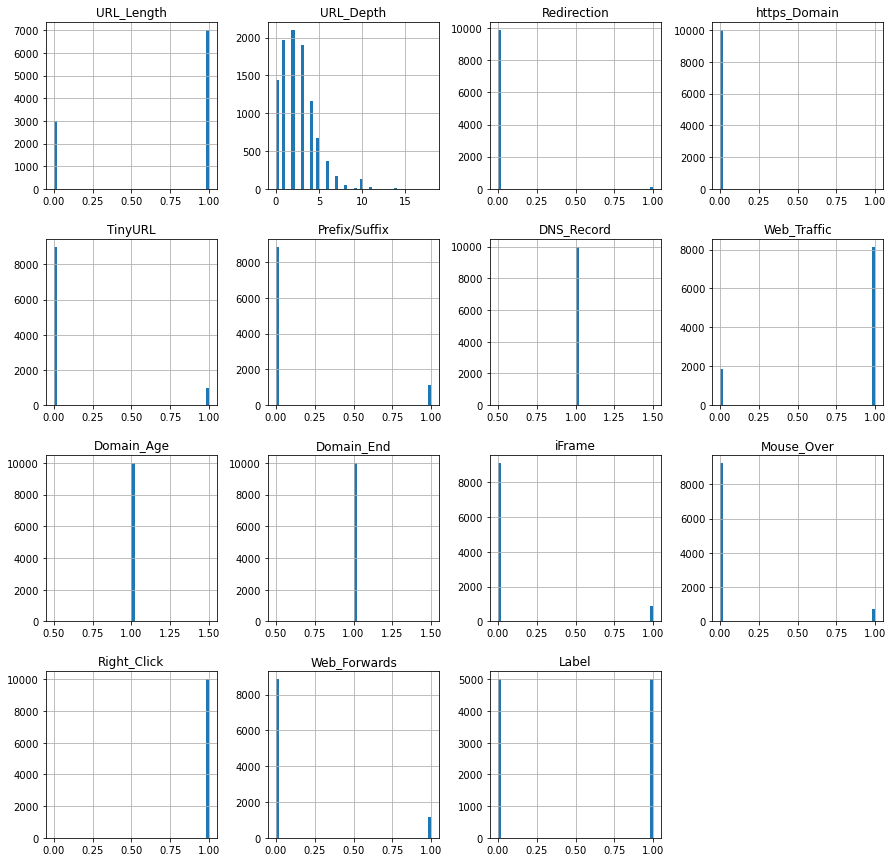

In [14]:
df_lp.hist(bins = 50, figsize = (15, 15))
plt.show()

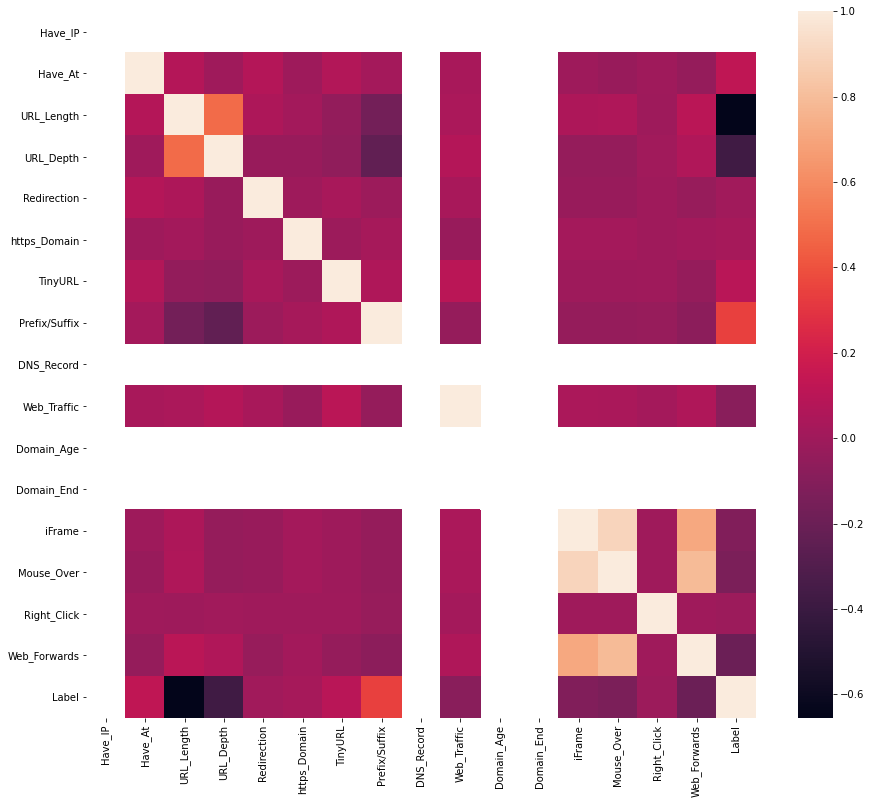

In [18]:
plt.figure(figsize = (15, 13))
sns.heatmap(df_lp.corr())
plt.show()

# 5. Data Preprocessing

In [19]:
df_lp.describe()

URL_Length     URL_Depth   Redirection  https_Domain       TinyURL  \
count  10000.000000  10000.000000  10000.000000   10000.00000  10000.000000   
mean       0.699800      2.558100      0.014200       0.00070      0.099300   
std        0.458368      2.068732      0.118321       0.02645      0.299079   
min        0.000000      0.000000      0.000000       0.00000      0.000000   
25%        0.000000      1.000000      0.000000       0.00000      0.000000   
50%        1.000000      2.000000      0.000000       0.00000      0.000000   
75%        1.000000      4.000000      0.000000       0.00000      0.000000   
max        1.000000     18.000000      1.000000       1.00000      1.000000   

       Prefix/Suffix  DNS_Record   Web_Traffic  Domain_Age  Domain_End  \
count   10000.000000     10000.0  10000.000000     10000.0     10000.0   
mean        0.113700         1.0      0.815200         1.0         1.0   
std         0.317462         0.0      0.388155         0.0         0.0   
min         0.000000         1.0      0.000000         1.0         1.0   
25%         0.000000         1.0      1.000000         1.0         1.0   
50%         0.000000         1.0      1.000000         1.0         1.0   
75%         0.000000         1.0      1.000000         1.0         1.0   
max         1.000000         1.0      1.000000         1.0         1.0   

             iFrame    Mouse_Over  Right_Click  Web_Forwards         Label  
count  10000.000000  10000.000000   10000.0000  10000.000000  10000.000000  
mean       0.090500      0.075000       0.9999      0.114500      0.500000  
std        0.286911      0.263405       0.0100      0.318433      0.500025  
min        0.000000      0.000000       0.0000      0.000000      0.000000  
25%        0.000000      0.000000       1.0000      0.000000      0.000000  
50%        0.000000      0.000000       1.0000      0.000000      0.500000  
75%        0.000000      0.000000       1.0000      0.000000      1.000000  
max        1.000000      1.000000       1.0000      1.000000      1.000000

The Domain column doesnt have any significance to the machine learning model training. So dropping the 'Domain' column from the dataset.

In [22]:
df_lp = df_lp.drop(['Domain'], axis = 1).copy()
df_lp.head()

Have_IP  Have_At  URL_Length  URL_Depth  Redirection  https_Domain  \
0    False    False           1          1            0             0   
1    False    False           1          1            1             0   
2    False    False           1          1            0             0   
3    False    False           1          3            0             0   
4    False    False           1          3            0             0   

   TinyURL  Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  Domain_End  \
0        0              0           1            1           1           1   
1        0              0           1            1           1           1   
2        0              0           1            1           1           1   
3        0              0           1            0           1           1   
4        0              0           1            1           1           1   

   iFrame  Mouse_Over  Right_Click  Web_Forwards  Label  
0       0           0            1             0      0  
1       0           0            1             0      0  
2       0           0            1             0      0  
3       0           0            1             0      0  
4       0           0            1             0      0

In [39]:
df_lp.loc[df_lp['Have_IP'] == True, 'Have_IP'] = 1
df_lp.loc[df_lp['Have_IP'] == False, 'Have_IP'] = 0

df_lp.loc[df_lp['Have_IP'] == True, 'Have_At'] = 1
df_lp.loc[df_lp['Have_IP'] == False, 'Have_At'] = 0

In [40]:
df_lp.head()

Have_IP Have_At  URL_Length  URL_Depth  Redirection  https_Domain  TinyURL  \
0       0       0           1          1            0             0        0   
1       0       0           1          1            1             0        0   
2       0       0           1          1            0             0        0   
3       0       0           1          3            0             0        0   
4       0       0           1          3            0             0        0   

   Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  Domain_End  iFrame  \
0              0           1            1           1           1       0   
1              0           1            1           1           1       0   
2              0           1            1           1           1       0   
3              0           1            0           1           1       0   
4              0           1            1           1           1       0   

   Mouse_Over  Right_Click  Web_Forwards  Label  
0           0            1             0      0  
1           0            1             0      0  
2           0            1             0      0  
3           0            1             0      0  
4           0            1             0      0

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [41]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
df_lp = df_lp.sample(frac=1).reset_index(drop=True)
df_lp.head()

Have_IP Have_At  URL_Length  URL_Depth  Redirection  https_Domain  TinyURL  \
0       0       0           1          2            0             0        0   
1       0       0           1          3            1             0        0   
2       0       0           1          1            0             0        0   
3       0       0           0          2            0             0        0   
4       0       0           0          0            0             0        0   

   Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  Domain_End  iFrame  \
0              0           1            1           1           1       1   
1              0           1            1           1           1       0   
2              0           1            0           1           1       0   
3              0           1            1           1           1       0   
4              0           1            1           1           1       0   

   Mouse_Over  Right_Click  Web_Forwards  Label  
0           1            1             1      0  
1           0            1             0      1  
2           0            1             0      1  
3           0            1             0      1  
4           0            1             0      1

In [61]:
df_lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Have_IP        10000 non-null  object
 1   Have_At        10000 non-null  object
 2   URL_Length     10000 non-null  int64 
 3   URL_Depth      10000 non-null  int64 
 4   Redirection    10000 non-null  int64 
 5   https_Domain   10000 non-null  int64 
 6   TinyURL        10000 non-null  int64 
 7   Prefix/Suffix  10000 non-null  int64 
 8   DNS_Record     10000 non-null  int64 
 9   Web_Traffic    10000 non-null  int64 
 10  Domain_Age     10000 non-null  int64 
 11  Domain_End     10000 non-null  int64 
 12  iFrame         10000 non-null  int64 
 13  Mouse_Over     10000 non-null  int64 
 14  Right_Click    10000 non-null  int64 
 15  Web_Forwards   10000 non-null  int64 
 16  Label          10000 non-null  int64 
dtypes: int64(15), object(2)
memory usage: 1.3+ MB


In [63]:
df_lp['Have_IP'] = pd.to_numeric(df_lp['Have_IP'])
df_lp['Have_At'] = pd.to_numeric(df_lp['Have_At'])

In [64]:
df_lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        10000 non-null  int64
 1   Have_At        10000 non-null  int64
 2   URL_Length     10000 non-null  int64
 3   URL_Depth      10000 non-null  int64
 4   Redirection    10000 non-null  int64
 5   https_Domain   10000 non-null  int64
 6   TinyURL        10000 non-null  int64
 7   Prefix/Suffix  10000 non-null  int64
 8   DNS_Record     10000 non-null  int64
 9   Web_Traffic    10000 non-null  int64
 10  Domain_Age     10000 non-null  int64
 11  Domain_End     10000 non-null  int64
 12  iFrame         10000 non-null  int64
 13  Mouse_Over     10000 non-null  int64
 14  Right_Click    10000 non-null  int64
 15  Web_Forwards   10000 non-null  int64
 16  Label          10000 non-null  int64
dtypes: int64(17)
memory usage: 1.3 MB


# 6. Splitting the Data

In [65]:
# Separating & assigning features and target columns to X & y
y = df_lp['Label']
X = df_lp.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [66]:
# Splitting the dataset into train and test sets: 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# 7. Machine Learning Models & Training

The supervised machine learning models (classification) considered to train the dataset in this notebook are:

- Random Forest
- XGBoost
- Support Vector Machines

In [67]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))

## 7.1. Random Forest:

Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [68]:
# instantiate the model
rForest = RandomForestClassifier(max_depth=5)

# fit the model 
rForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [69]:
#predicting the target value from the model for the samples
y_test_forest = rForest.predict(X_test)
y_train_forest = rForest.predict(X_train)

### Performance Evaluation:

In [70]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.856
Random forest: Accuracy on test Data: 0.849


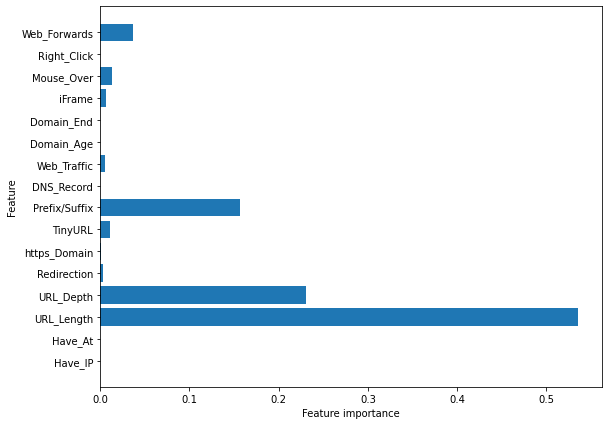

In [71]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), rForest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### Storing the results:

In [72]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## 7.2. XGBoost:

XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [73]:
# instantiate the model
xgb = XGBClassifier(use_label_encoder=False,learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

[01:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [74]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

### Performance Evaluation:

In [75]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.871
XGBoost : Accuracy on test Data: 0.867


### Storing the results:

In [76]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## 7.3. Support Vector Machines:

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [79]:
# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [80]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

### Performance Evaluation:

In [81]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.852
SVM : Accuracy on test Data: 0.849


### Storing the Results:

In [82]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

# 8. Comparision of Models:

To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [83]:
#creating dataframe
compResults = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
compResults

ML Model  Train Accuracy  Test Accuracy
0  Random Forest           0.856          0.848
1        XGBoost           0.871          0.867
2            SVM           0.852          0.848

In [85]:
#Sorting the datafram on accuracy
compResults.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

ML Model  Train Accuracy  Test Accuracy
1        XGBoost           0.871          0.867
0  Random Forest           0.856          0.848
2            SVM           0.852          0.848

For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [87]:
# save XGBoost model to file
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

### Testing the saved model:

In [97]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))

In [98]:
input = {
#     0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1
    "Have_IP" : 0,
    "Have_At" : 0,
    "URL_Length" : 1,  
    "URL_Depth" : 2,
    "Redirection" : 0,
    "https_Domain" : 0,
    "TinyURL" : 0,
    "Prefix/Suffix" : 0,
    "DNS_Record" : 1,
    "Web_Traffic" : 1,
    "Domain_Age": 1,
    "Domain_End": 1,
    "iFrame" : 1,
    "Mouse_Over" : 1,
    "Right_Click" : 1,
    "Web_Forwards" : 1,
}

In [100]:
input_df = pd.DataFrame(input,index=[0])

In [102]:
loaded_model.predict_proba(input_df)

array([[0.9758103 , 0.02418974]], dtype=float32)

# 9. References:

- https://blog.keras.io/building-autoencoders-in-keras.html
- https://en.wikipedia.org/wiki/Autoencoder
- https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
- https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
- https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/
- https://github.com/shreyagopal/Phishing-Website-Detection-by-Machine-Learning-Techniques/blob/master/Phishing%20Website%20Detection_Models%20%26%20Training.ipynb